<a href="https://colab.research.google.com/github/ashikshafi08/Fingerprint_restoration_with_MIRNet/blob/main/FingerPrint_with_MIRNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [1]:
# Training data 
!wget http://158.109.8.102/Inpainting/Track3/training_input.zip
!wget http://158.109.8.102/Inpainting/Track3/training_ground-truth.zip

--2022-05-15 11:38:48--  http://158.109.8.102/Inpainting/Track3/training_input.zip
Connecting to 158.109.8.102:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2579851470 (2.4G) [application/zip]
Saving to: ‘training_input.zip’

training_input.zip  100%[===================>]   2.40G  11.3MB/s    in 3m 17s  

2022-05-15 11:42:06 (12.5 MB/s) - ‘training_input.zip’ saved [2579851470/2579851470]

--2022-05-15 11:42:06--  http://158.109.8.102/Inpainting/Track3/training_ground-truth.zip
Connecting to 158.109.8.102:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2551253143 (2.4G) [application/zip]
Saving to: ‘training_ground-truth.zip’

training_ground-tru 100%[===================>]   2.38G  11.3MB/s    in 3m 51s  

2022-05-15 11:45:57 (10.5 MB/s) - ‘training_ground-truth.zip’ saved [2551253143/2551253143]



In [ ]:
!unzip '/content/training_ground-truth.zip'
!unzip '/content/training_input.zip'

In [3]:
# Validation set 
!wget http://158.109.8.102/Inpainting/Track3/validation_input.zip
!wget http://158.109.8.102/Inpainting/Track3/validation_ground-truth.zip

--2022-05-15 11:47:15--  http://158.109.8.102/Inpainting/Track3/validation_input.zip
Connecting to 158.109.8.102:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287411123 (274M) [application/zip]
Saving to: ‘validation_input.zip’

validation_input.zi 100%[===================>] 274.10M  21.2MB/s    in 28s     

2022-05-15 11:47:43 (9.93 MB/s) - ‘validation_input.zip’ saved [287411123/287411123]

--2022-05-15 11:47:43--  http://158.109.8.102/Inpainting/Track3/validation_ground-truth.zip
Connecting to 158.109.8.102:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 284579406 (271M) [application/zip]
Saving to: ‘validation_ground-truth.zip’

validation_ground-t 100%[===================>] 271.40M  23.6MB/s    in 13s     

2022-05-15 11:47:56 (20.9 MB/s) - ‘validation_ground-truth.zip’ saved [284579406/284579406]



In [ ]:
# Unzipping the validation set 
!unzip '/content/validation_ground-truth.zip'
!unzip '/content/validation_input.zip'

In [5]:
# Test set 
# !wget http://158.109.8.102/Inpainting/Track3/test_input.zip
# !wget http://158.109.8.102/Inpainting/Track3/test_ground-truth.zip

In [6]:
# Data paths 

train_input_path = '/content/drive/MyDrive/Final_year_project/train/training_input/'
train_ground_path = '/content/drive/MyDrive/Final_year_project/train/training_ground-truth/'

val_input_path = '/content/drive/MyDrive/Final_year_project/val/validation_input/'
val_ground_path = '/content/drive/MyDrive/Final_year_project/val/validation_ground-truth/'

In [7]:
inp_path = '/content/training_ground-truth'
ground_truth_path = '/content/training_ground-truth'

In [8]:
# How many images in there? 

import os 

print(f'There are {len(os.listdir(inp_path))} training input images')
print(f'There are {len(os.listdir(ground_truth_path))} training ground truth images')

#print(f'There are {len(os.listdir(val_input_path))} validation input images')
#print(f'There are {len(os.listdir(val_ground_path))} validation ground truth images')

There are 75600 training input images
There are 75600 training ground truth images


In [9]:
import os
import random 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import tensorflow as tf


In [10]:
train_input_fns = sorted(os.listdir(inp_path))
train_ground_fns = sorted(os.listdir(ground_truth_path))

val_input_fns = sorted(os.listdir('/content/validation_input/'))
val_ground_fns = sorted(os.listdir('/content/validation_ground-truth/'))
train_input_fns[:10] , train_ground_fns[:10]

(['1.jpg',
  '10.jpg',
  '100.jpg',
  '1000.jpg',
  '10000.jpg',
  '10001.jpg',
  '10002.jpg',
  '10003.jpg',
  '10004.jpg',
  '10005.jpg'],
 ['1.jpg',
  '10.jpg',
  '100.jpg',
  '1000.jpg',
  '10000.jpg',
  '10001.jpg',
  '10002.jpg',
  '10003.jpg',
  '10004.jpg',
  '10005.jpg'])

In [11]:
# How many images in training set? 
len(train_input_fns) , len(train_ground_fns)

(75600, 75600)

In [13]:
# How many images are in the validation set? 
len(val_input_fns) , len(val_ground_fns)

(8400, 8400)

In [14]:
# Specifying the paths 
training_input_path = '/content/training_input/'
training_ground_truth_path = '/content/training_ground-truth/'

val_input_path = '/content/validation_input/'
val_ground_truth_path = '/content/validation_ground-truth/'

Plot 3x3 matrix of pictures of the ground truth vs noisy finger prints. 

- Dynamic creation of path lists based on the arguments. 
- Rather the filenames, pick random indexes. For train the index len will be different than that of a val. 

In [15]:
val_idxs = np.arange(len(os.listdir(val_input_path)))
val_idxs[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
# def make_plots(set = 'train'):

#   if set:
#     trainInputPaths = sorted(glob.glob(os.path.join(training_input_path , '*.jpg')))
#     trainGroundPaths = sorted(glob.glob(os.path.join(training_ground_truth_path , '*.jpg')))

#     trainIdxs = np.arange(len(trainInputPaths))

#     for i in range(2):
      
#       plt.figure(figsize = (15 , 7))
#       #ax = plt.subplot(3 , 3 , i+ 1)
#       plt.title('Fingerprints with noise and')
#       randomIdx = random.choice(trainIdxs)
#       img = mpimg.imread(trainInputPaths[randomIdx])

#       trueImg = mpimg.imread(trainGroundPaths[randomIdx])
#       plt.title('Respective Ground truth of the above Fingerprints')
#       plt.imshow(img)
#       plt.axis('off')
  
      
      
      


#   else:
#     valInputPaths = sorted(glob.glob(os.path.join(val_input_path , '*.jpg')))
#     valGroundPaths = sorted(glob.glob(os.path.join(val_ground_path , '*.jpg')))

#     valIdxs = np.arange(len(valInputPaths))


In [ ]:
# Getting the file names as paths 
trainInputPaths = sorted(glob.glob(os.path.join(training_input_path , '*.jpg')))
trainGroundPaths = sorted(glob.glob(os.path.join(training_ground_truth_path , '*.jpg')))

valInputPaths = sorted(glob.glob(os.path.join(val_input_path , '*.jpg')))
valGroundPaths = sorted(glob.glob(os.path.join(val_ground_path , '*.jpg')))


In [ ]:
listds = tf.data.Dataset.list_files(trainInputPaths)

for sample in listds.take(5):
  print(sample.numpy())

In [ ]:
# Function to decode jpeg or jpg from a file path 
def decode_image(path):
  img = tf.io.read_file(path)
  img = tf.io.decode_jpeg(img , channels = 3)
  img = tf.image.resize(img , [224 , 224])
  return img

In [ ]:
decode_image(trainInputPaths[48])

### Things to do: 

- Create a tf data dataset for train and validation set, 

    ```
    tf.data.Dataset.from_tensor_slices((ground_truth , input_image))
    ```
- Train a simple Unet model and use it as a basline. 
- Visualize the dataset, write a function to plot the ground truth vs noisy images par to par. 
- Finite and create a more robust perfomant dataset, with prefetching, cache's etc. 

In [27]:
# Function to read the image from the path 

def read_image(image_path):

  '''
  image_path : path of the image 

  '''

  image = tf.io.read_file(image_path) # read the path 
  image = tf.image.decode_jpeg(image , channels = 3) # decode into jpeg  
  image = tf.image.resize(image , [224 , 224]) # resize the image 
  return image  




In [58]:
# Specifying the paths 
import glob

training_input_path = '/content/training_input/'
training_ground_truth_path = '/content/training_ground-truth/'

val_input_path = '/content/validation_input/'
val_ground_truth_path = '/content/validation_ground-truth'

trainInputPaths = sorted(glob.glob(os.path.join(training_input_path , '*.jpg')))
trainGroundPaths = sorted(glob.glob(os.path.join(training_ground_truth_path , '*.jpg')))


valInputPaths = sorted(glob.glob(os.path.join(val_input_path , '*.jpg')))
valGroundPaths = sorted(glob.glob(os.path.join(val_ground_truth_path , '*.jpg')))

len(valGroundPaths) , len(valInputPaths)

(8400, 8400)

In [59]:
# Setting up the parameters 
IMAGE_SIZE = 224 
BATCH_SIZE = 16 
MAX_TRAIN_IMAGES = 400 

In [60]:
# Function to random crop the images 


def random_crop(noise_image , truth_image):

  noise_image_shape = tf.shape(noise_image)[:2] # width and height of the image 

  noise_width = tf.random.uniform(
      shape = () , maxval = noise_image_shape[1] - IMAGE_SIZE + 1 , dtype = tf.int32
  )

  noise_height = tf.random.uniform(
      shape = () , maxval = noise_image_shape[0] - IMAGE_SIZE + 1 , dtype = tf.int32 
  )

  truth_width = noise_width 
  truth_height = noise_height 

  # Define the cropping area 
  noise_image_cropped = noise_image[
                                    noise_height:noise_height + IMAGE_SIZE , 
                                    noise_width:noise_width + IMAGE_SIZE
                                    ]
  truth_image_cropped = truth_image[
                                    truth_height: truth_height + IMAGE_SIZE , 
                                    truth_width:truth_width + IMAGE_SIZE
  ]

  return noise_image_cropped , truth_image_cropped

In [61]:
def tf_random_crop(image):
  cropped_image = tf.image.random_crop(
      image, size=[224, 224, 3])

  return cropped_image

In [62]:
# Function to load the data and apply the transforms 

def load_data(noise_image_path , truth_image_path):

  noise_image = read_image(noise_image_path)
  truth_image = read_image(truth_image_path)

  cropped_noise_image = tf_random_crop(noise_image)
  cropped_truth_image = tf_random_crop(truth_image)

  return cropped_noise_image , cropped_truth_image

In [63]:
# Passing in sample data inside 

sample_noise_image , sample_truth_image = load_data(trainInputPaths[3] , trainGroundPaths[3])

In [64]:
sample_noise_image.shape , sample_truth_image.shape

(TensorShape([224, 224, 3]), TensorShape([224, 224, 3]))

(-0.5, 223.5, 223.5, -0.5)

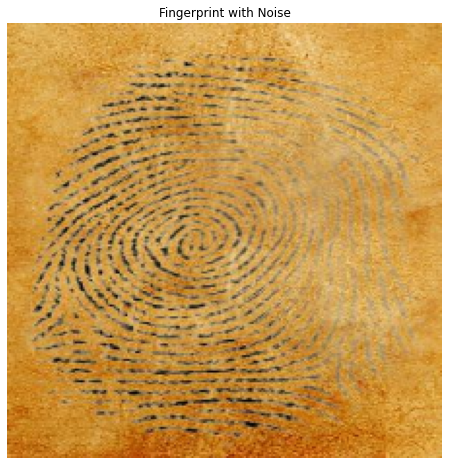

In [65]:
# Visualiizng the finger print filled with noise 
plt.figure(figsize = (12 ,8))
plt.title('Fingerprint with Noise')
plt.imshow(sample_noise_image.numpy().astype('uint8'));
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

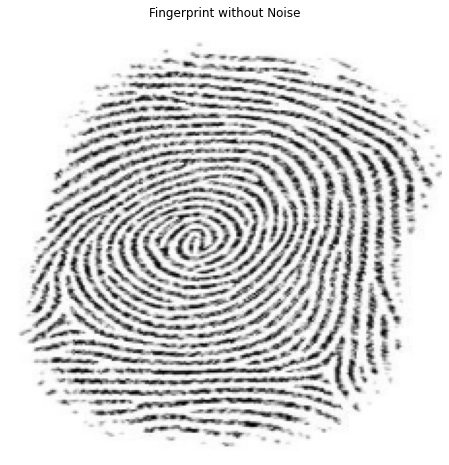

In [66]:
# Visualiizng the finger print filled with noise 
plt.figure(figsize = (12 ,8))
plt.title('Fingerprint without Noise')
plt.imshow(sample_truth_image.numpy().astype('uint8'));
plt.axis('off')


In [70]:
# Function to make the tf.data.Dataset 

def get_dataset(noise_image_paths , truth_image_paths):

  dataset = tf.data.Dataset.from_tensor_slices((noise_image_paths , truth_image_paths))

  # Need to apply the transforms 
  dataset = dataset.map(load_data , num_parallel_calls = tf.data.AUTOTUNE)
  dataset = dataset.batch(BATCH_SIZE , drop_remainder= True).cache().prefetch(tf.data.AUTOTUNE)
  
  return dataset


In [71]:
# Creating the dataset 

train_dataset = get_dataset(trainInputPaths , trainGroundPaths)
val_dataset = get_dataset(valInputPaths , valGroundPaths)

print(f'Train Dataset --> {train_dataset}')
print('\n')
print(f'Val Dataset --> {val_dataset}')

Train Dataset --> <PrefetchDataset element_spec=(TensorSpec(shape=(16, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(16, 224, 224, 3), dtype=tf.float32, name=None))>


Val Dataset --> <PrefetchDataset element_spec=(TensorSpec(shape=(16, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(16, 224, 224, 3), dtype=tf.float32, name=None))>


In [72]:
len(trainInputPaths) + len(trainGroundPaths)

151200